In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression as LR  # 线性回归
from sklearn.model_selection import train_test_split  # 划分训练测试集
from sklearn.cluster import KMeans




In [2]:
# 所有表格的结构
# 1. 读取数据
# acs_5yr = pd.read_csv('./acs_5yr_est_selected_economic_characteristics_2010-2022.csv')
# all_comm = pd.read_csv('./all_commodities.csv')
# all_stock = pd.read_csv('./all_stock_and_etfs.csv')
# storage = pd.read_csv('./Meat_Stats_Cold_Storage.csv')
# production = pd.read_csv('./Meat_Stats_Meat_Production.csv')
# counts = pd.read_csv('./Meat_Stats_Slaughter_Counts.csv')
# Meat_weights = pd.read_csv('./Meat_Stats_Slaughter_Weights.csv')
# nutrition = pd.read_csv('./Nutrition_Physical_Activity_and_Obesity_Data.csv')
# stock_des = pd.read_csv('./stock_descriptions.csv')
# tables = [acs_5yr, all_comm, all_stock, storage, production, counts, weights, nutrition, stock_des]
# acs_5yr['Label (Grouping)']

In [3]:
data = pd.read_csv("./adult_income_obesity.csv")

In [4]:
data = data.dropna(subset=['Median household income (dollars)'],axis = 0)

slope = 75.02659039411878  intercept = 37.67013822016381 coef = 0.22027086347698105
slope = 60.18053580218911  intercept = 28.78368347654187 coef = 0.19718148925729354
slope = 111.65074787852605  intercept = 28.94819208317111 coef = 0.18636772757199188
slope = 99.19118146095839  intercept = 37.26198397390242 coef = 0.2917742655393996
slope = 182.0440935608638  intercept = 33.58490625155379 coef = 0.3050203725321915
slope = 189.95939576954473  intercept = 31.6763622961176 coef = 0.2779334302282358
slope = 181.35118842215496  intercept = 24.94728834533768 coef = 0.17550799859195018
slope = 160.75301489909484  intercept = 26.454081067627733 coef = 0.19713421043495802
slope = 295.29205025698025  intercept = 31.128287723575493 coef = 0.33867570929148494
slope = 162.07744436750195  intercept = 39.45811076739465 coef = 0.2830260221116626
slope = 288.26296032835387  intercept = 36.29268598869989 coef = 0.35055274808857323
slope = -30.129351021040154  intercept = 28.67434943827055 coef = -0.124

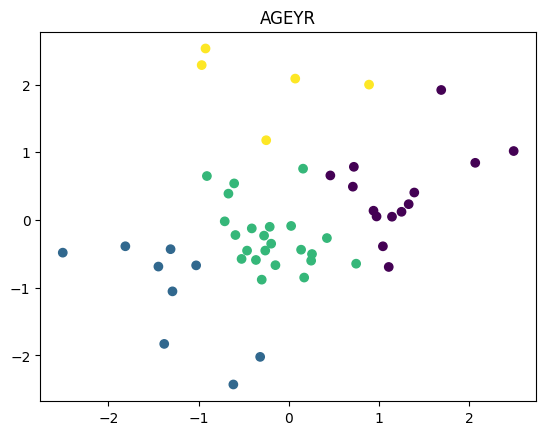

slope = 90.75582038875682  intercept = 40.1431337236177 coef = 0.34514783250581804
slope = 96.73511346477366  intercept = 31.700323264895957 coef = 0.441922383894039
slope = 135.83290089108525  intercept = 30.570653441366673 coef = 0.3473397157853393
slope = 94.25432973247382  intercept = 37.53877504072567 coef = 0.4770684184588939
slope = 192.56522923299102  intercept = 34.99962861852761 coef = 0.49795688355815737
slope = 224.83271787341087  intercept = 32.815693538397205 coef = 0.5171596731045339
slope = 156.09553154234496  intercept = 25.73402932247061 coef = 0.23858098861248253
slope = 153.7581362343513  intercept = 27.86011966182525 coef = 0.30906089544603355
slope = 320.09663848806036  intercept = 31.252499684366267 coef = 0.5596752577541122
slope = 179.25617526520853  intercept = 41.19057638601143 coef = 0.5658631242634363
slope = 281.94943801675794  intercept = 36.851961795443 coef = 0.6012369111155519
slope = -65.46063946021265  intercept = 37.57329939351408 coef = -0.23307010

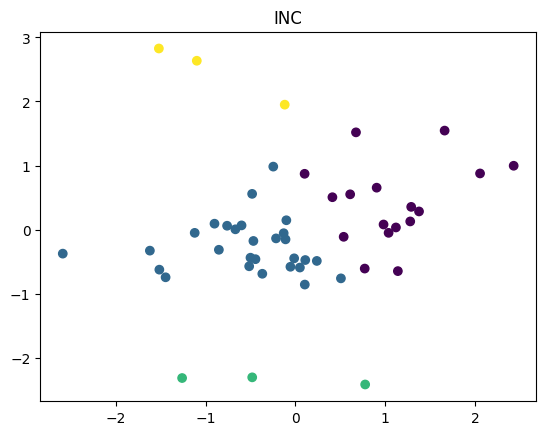

slope = 60.00650562903816  intercept = 35.983648950793764 coef = 0.244716485781951
slope = 68.95942702722056  intercept = 30.34848923165168 coef = 0.2737700656508207
slope = 137.11337631479648  intercept = 29.548348505658588 coef = 0.31099880256062834
slope = 95.7054270054417  intercept = 37.294839845090905 coef = 0.34632581106106475
slope = 162.29942562842498  intercept = 34.012889031199876 coef = 0.45641748012276856
slope = 191.57283959866248  intercept = 32.3279933164562 coef = 0.4667416646157024
slope = 166.17801667285576  intercept = 25.47596660043736 coef = 0.21612480215248348
slope = 132.7314433408503  intercept = 27.977699329301267 coef = 0.28474586239396166
slope = 278.7054816590139  intercept = 31.14793989948611 coef = 0.5366505260591674
slope = 161.20373532523055  intercept = 39.931838372668366 coef = 0.518008692446283
slope = 274.9130575523388  intercept = 36.063933802569714 coef = 0.7036079041521796
slope = -40.49859253364102  intercept = 35.09293721956236 coef = -0.129254

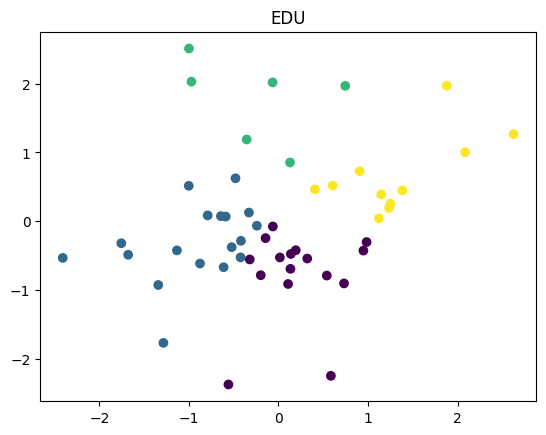

slope = 71.36565770575352  intercept = 37.539776726453084 coef = 0.6048997441183555
slope = 57.06045361025281  intercept = 29.238200533618095 coef = 0.8119958190156435
slope = 111.11608424378228  intercept = 29.563477711159965 coef = 0.8498527036462171
slope = 94.52137222377662  intercept = 37.09973015393972 coef = 0.7366000741334805
slope = 174.6718808033124  intercept = 34.08636709332914 coef = 0.7801446016235618
slope = 183.08077316990824  intercept = 32.04400812939685 coef = 0.7966580101897587
slope = 160.28318968664536  intercept = 25.39838441732817 coef = 0.4375349996467733
slope = 144.37362103876058  intercept = 27.583678721628047 coef = 0.5655535062546049
slope = 281.25728585315585  intercept = 31.354905492034753 coef = 0.8140149320494529
slope = 160.08642380673217  intercept = 39.68584148800873 coef = 0.8623946921351183
slope = 273.6572180647965  intercept = 36.63807248273042 coef = 0.975017926347316
slope = -23.74408237803443  intercept = 26.95265125874886 coef = -0.658992812

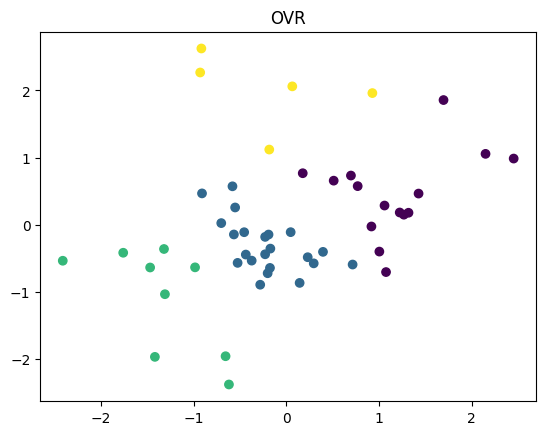

slope = 80.55961191390365  intercept = 38.90956179265632 coef = 0.2377904734463131
slope = 76.27076057891968  intercept = 31.153369530525364 coef = 0.1539897976420667
slope = 100.16116978069807  intercept = 27.713576813300605 coef = 0.10283802247193169
slope = 122.36037674678917  intercept = 42.25358678845418 coef = 0.32472221672103885
slope = 165.53843324187082  intercept = 32.914426395488825 coef = 0.1840486550488237
slope = 122.56172355425385  intercept = 33.366669655348105 coef = 0.12622854598603492
slope = 425.8704881035155  intercept = 18.824855995770076 coef = 0.30841842096870753
slope = 183.25112773904266  intercept = 27.218711864048593 coef = 0.2170696528759321
slope = 383.2469327769416  intercept = 29.56849860033524 coef = 0.28319718844972647
slope = 100.89304439698121  intercept = 36.75808300486534 coef = 0.12759748974927215
slope = 279.79221688359235  intercept = 38.78009291852553 coef = 0.4735079802265984
slope = -22.85237647861123  intercept = 23.75112229146128 coef = -0.

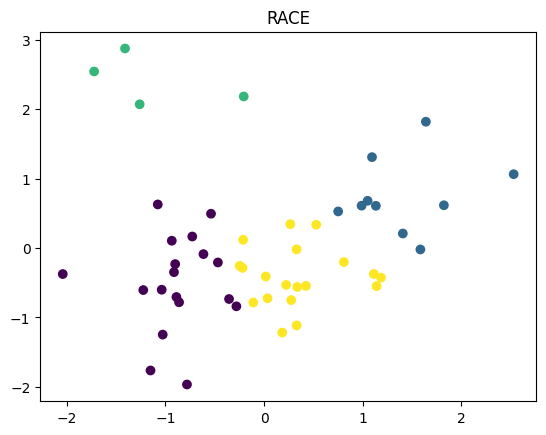

slope = 72.08432807413737  intercept = 37.59976352997507 coef = 0.5471472242054456
slope = 58.17808277302052  intercept = 29.24578619826268 coef = 0.7224034828795878
slope = 112.23701605284673  intercept = 29.532235435233655 coef = 0.7746911475066381
slope = 94.36769693507982  intercept = 37.074074951966736 coef = 0.6909478113941153
slope = 175.03198335064894  intercept = 34.0924298091189 coef = 0.7353501272716898
slope = 183.47934812358355  intercept = 32.03801421457908 coef = 0.753282167632809
slope = 163.33106340656497  intercept = 25.330354515648974 coef = 0.42890172839126167
slope = 144.84789701792636  intercept = 27.57120781082685 coef = 0.48685275654916504
slope = 282.0827837336818  intercept = 31.352687123969094 coef = 0.7600560861769512
slope = 159.4122381452224  intercept = 39.65848238955715 coef = 0.8083465261900882
slope = 274.5206292871667  intercept = 36.64413333333575 coef = 0.9062675865430422
slope = -24.395821458805603  intercept = 26.91518226339806 coef = -0.174067388

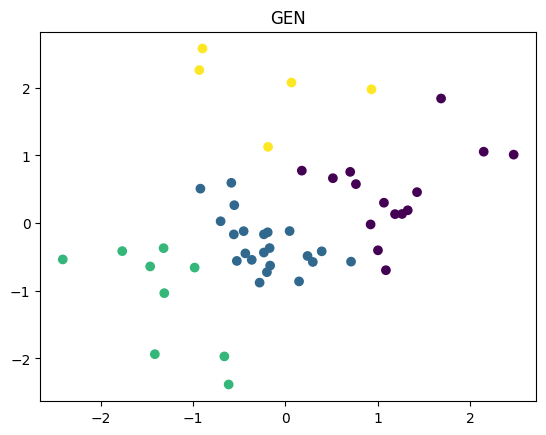

In [5]:
for id in data['adult_StratificationCategoryId1'].unique():
    beta_0, beta_1 = [], []
    data_id = data[data['adult_StratificationCategoryId1'] == id]
    for state in data_id["LocationDesc"].unique():
        if state == "National":
            continue
        # print(state)
        state_data = data_id[data_id["LocationDesc"] == state]
        x = state_data['Mean household income (dollars)'].str.replace(',', '').astype(int) / state_data[
            'Median household income (dollars)'].str.replace(',', '').astype(int)
        sub = (data['Mean household income (dollars)'].str.replace(',', '').astype(int) / data[
            'Median household income (dollars)'].str.replace(',', '').astype(int)).mean()
        std_div = (data['Mean household income (dollars)'].str.replace(',', '').astype(int) / data[
            'Median household income (dollars)'].str.replace(',', '').astype(int)).std()
        x = x - sub
        # print(sub)
        y = state_data['adult_obesity_Value'] 
        reg = LR().fit(x.values.reshape(-1, 1), y)
        beta_0.append(reg.intercept_)
        beta_1.append(reg.coef_[0])
        print('slope =', reg.coef_[0], ' intercept =', reg.intercept_, 'coef =', np.corrcoef(x, y)[0, 1])
        # print()
    state_list = data_id["LocationDesc"].unique()
    state_geo = data_id["geolocation"].unique()
    beta_0 = (beta_0 - np.mean(beta_0)) / np.std(beta_0)
    beta_1 = (beta_1 - np.mean(beta_1)) / np.std(beta_1)
    df = pd.DataFrame({'state': state_list, 'state_geo': state_geo, 'beta_0': beta_0, 'beta_1': beta_1})
    df.to_csv('state_regr_plot_data.csv')
    k_means = KMeans(n_clusters=4, random_state=0, max_iter=1000).fit(np.array([beta_0, beta_1]).T)
    plt.scatter(beta_0, beta_1, c=k_means.labels_)
    plt.title(id)
    plt.show()

slope = -0.538993208499493  intercept = 0.6332615683824867 coef01 = 0.5471472242054455 coef02= 0.6396771932328588 coef12= 0.9353599147720381
slope = 0.12283054069071705  intercept = 0.0538650553889643 coef01 = 0.7224034828795882 coef02= 0.769845512827203 coef12= 0.9011385194272563
slope = 0.5019421631727088  intercept = -0.45460515774749316 coef01 = 0.7746911475066385 coef02= 0.8220144951263961 coef12= 0.7724280025092563
slope = -1.7794326937291436  intercept = 1.9349306644961555 coef01 = 0.6909478113941155 coef02= 0.8346433617266996 coef12= 0.9575504623230933
slope = 0.36820656283065206  intercept = -0.3695689136258335 coef01 = 0.7353501272716897 coef02= 0.8989583543439722 coef12= 0.7402062968778931
slope = 0.6426790623129989  intercept = -0.6953354789602739 coef01 = 0.7532821676328089 coef02= 0.8710474292114818 coef12= 0.7180790405228692
slope = 1.0557548217363184  intercept = -1.3780197493554678 coef01 = 0.4289017283912615 coef02= 0.7964111013119609 coef12= 0.20507439842484865
slope

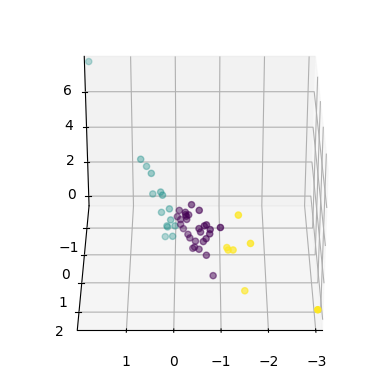

In [8]:
# for id in data['adult_StratificationCategoryId1'].unique():
beta_0, beta_1,beta_2 = [], [],[]
# data_id = data[data['adult_StratificationCategoryId1'] == id]
for state in data["LocationDesc"].unique():
    if state == "National":
        continue
    # print(state)
    state_data = data_id[data_id["LocationDesc"] == state]
    x1 = state_data['Mean household income (dollars)'].str.replace(',', '').astype(int) / state_data[
        'Median household income (dollars)'].str.replace(',', '').astype(int)
    x2 = state_data['Mean household income (dollars)'].str.replace(',', '').astype(int)
    x = pd.DataFrame({'x1':x1.values,'x2':x2.values})
    y = state_data['adult_obesity_Value']/100
    reg = LR().fit(x.values.reshape(-1, 2), y)
    beta_0.append(reg.intercept_)
    beta_1.append(reg.coef_[0])
    beta_2.append(reg.coef_[1])
    print('slope =', reg.coef_[0], ' intercept =', reg.intercept_, 'coef01 =', np.corrcoef(x.x1, y)[0, 1],'coef02=',np.corrcoef(x.x2,y)[0,1], 'coef12=',np.corrcoef(x.x1,x.x2)[0,1])
    # print()
k_means = KMeans(n_clusters=3, random_state=0, max_iter=10000).fit(np.array([beta_0, beta_1,beta_2]).T)

from mpl_toolkits.mplot3d import Axes3D
# 假设你有beta_0, beta_1, beta_2这三个特征列表
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(beta_0, beta_1, beta_2,c=k_means.labels_)
ax.set_xlim([min(beta_0), max(beta_0)])
ax.set_ylim([min(beta_1), max(beta_1)])
ax.set_zlim([min(beta_2), max(beta_2)])
ax.view_init(elev=30, azim=90)
plt.show()

In [9]:
from scipy.spatial.distance import pdist, squareform

def is_coplanar(points, tolerance=10e-3):
    distances = pdist(points, metric='euclidean')
    gram_matrix = squareform(distances) ** 2
    determinant = np.linalg.det(gram_matrix)
    return abs(determinant) < tolerance